# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [38]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


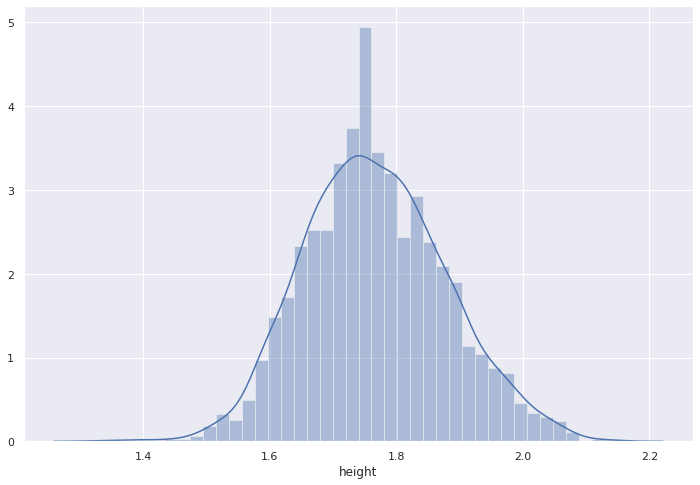

In [6]:
# Sua análise começa aqui.
height_sample = get_sample(athletes, 'height', 3000)
sns.distplot(height_sample)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [34]:
def q1():
    """Answer of question 01
    
    Returns
    -------
    bool
        'True' if the H0 (the distribution is a normal distribution) is
        accepted (p value of shapiro test is higher than 5%) and 'False' if
        H0 is rejected
    """
    
    height_sample = get_sample(athletes, 'height', 3000)
    shapiro_pvalue = sct.shapiro(height_sample)[1]
    if shapiro_pvalue >= 0.05:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [35]:
def q2():
    """Answer of question 02
    
    Returns
    -------
    bool
        'True' if the H0 (the distribution is a normal distribution) is
        accepted (p value of jarque bera test is higher than 5%) and 'False' if
        H0 is rejected
    """
    
    height_sample = get_sample(athletes, 'height', 3000)
    jarque_pvalue = sct.shapiro(height_sample)[1]
    if jarque_pvalue >= 0.05:
        return True
    else:
        return False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [36]:
def q3():
    """Answer of question 03
    
    Returns
    -------
    bool
        'True' if the H0 (the distribution is a normal distribution) is
        accepted (p value of normal test is higher than 5%) and 'False' if
        H0 is rejected
    """
    
    weight_sample = get_sample(athletes, 'weight', 3000)
    normaltest_pvalue = sct.normaltest(weight_sample)[1]
    if normaltest_pvalue >= 0.05:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [58]:
def q4():
    """Answer of question 04
    
    Returns
    -------
    bool
        'True' if the H0 (the distribution is a normal distribution) is
        accepted (p value of normal test is higher than 5%) and 'False' if
        H0 is rejected
    """
    
    weight_sample = get_sample(athletes, 'weight', 3000)
    log_weight = np.log(weight_sample)
    normaltest_pvalue = sct.normaltest(log_weight)[1]
    print(normaltest_pvalue)
    if normaltest_pvalue >= 0.05:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [43]:
bra = athletes[athletes['nationality'] == 'BRA']
usa = athletes[athletes['nationality'] == 'USA']
can = athletes[athletes['nationality'] == 'CAN']

In [51]:
print('Brazilian height variance: {}'.format(bra['height'].var().round(3)))
print('American height variance: {}'.format(usa['height'].var().round(3)))
print('Canadian height variance: {}'.format(can['height'].var().round(3)))

Brazilian height variance: 0.014
American height variance: 0.014
Canadian height variance: 0.014


In [82]:
def q5():
    """Answer of question 05
    
    Returns
    -------
    bool
        'True' if the mean height of brazilian and american athletes are statistically
        identical (H0 accepted) and 'False' otherwise
    """
    
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    
    ttest_pvalue = sct.ttest_ind(bra['height'], usa['height'],
                                 equal_var=False, nan_policy='omit')[1]
    print(ttest_pvalue)
    if ttest_pvalue >= 0.05:
        return True
    else:
        return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [84]:
def q6():
    """Answer of question 06
    
    Returns
    -------
    bool
        'True' if the mean height of brazilian and canadian athletes are statistically
        identical (H0 accepted) and 'False' otherwise
    """
    
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    
    ttest_pvalue = sct.ttest_ind(bra['height'], can['height'],
                                 equal_var=False, nan_policy='omit')[1]
    if ttest_pvalue >= 0.05:
        return True
    else:
        return False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [86]:
def q7():
    """Answer of question 07
    
    Returns
    -------
    float
        P value of T-test for the mean height of american and canadian athletes
    """
    
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    
    ttest_pvalue = sct.ttest_ind(usa['height'], can['height'],
                                 equal_var=False, nan_policy='omit')[1]
    
    return float(ttest_pvalue.round(8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?